In [27]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import time
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import History, LearningRateScheduler, TensorBoard

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
main_dir = '/content/Masks Dataset'
train_dir = "C:/Users/Asus/Masks Dataset/Train"
valid_dir = "C:/Users/Asus/Masks Dataset/Validation"
test_dir = "C:/Users/Asus/Masks Dataset/Test"

train_mask_dir = "C:/Users/Asus/Masks Dataset/Train/Mask"
train_No_mask_dir = "C:/Users/Asus/Masks Dataset/Train/Non Mask"

In [3]:
train_mask= os.listdir(train_mask_dir)
print(train_mask[0:10])

['-110603108-gettyimages-533567012.jpg', '-110695084-mask2.jpg', '0-with-mask.jpg', '0000305-62360-halyard-health-pfr-p3-respirator-face-mask-ffp.jpeg', '0000444-48296-halyard-health-surgical-mask-teddy-bear-print.jpeg', '0003.jpg', '0006.jpg', '0018.jpg', '0019.jpg', '0022.jpg']


In [4]:
train_No_mask = os.listdir(train_No_mask_dir)
print(train_No_mask[0:10])

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


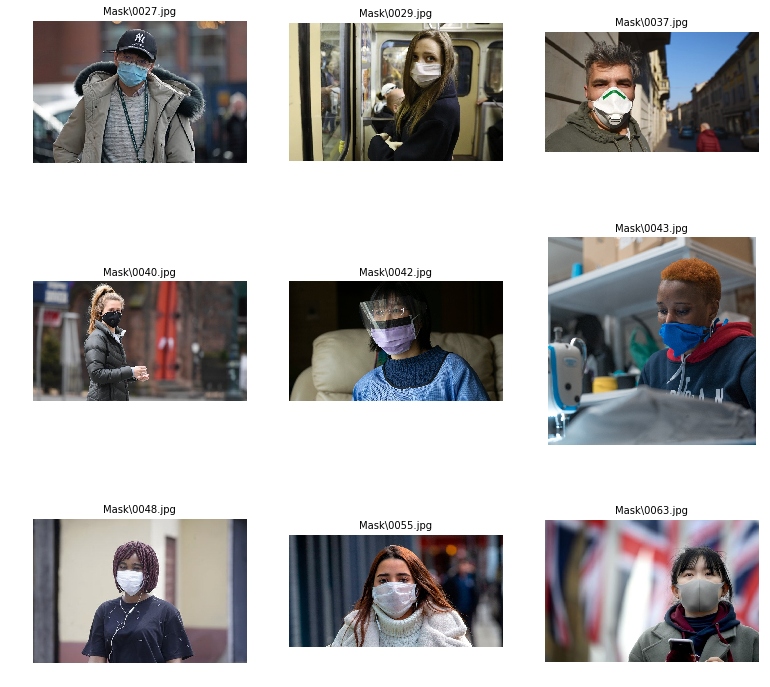

In [5]:
plt.figure(figsize=(13,13))

mask_pic = []
for i in train_mask[10:19]:
  mask_pic.append(os.path.join(train_mask_dir,i))


for i in range(0,len(mask_pic)):
  data = mask_pic[i].split('/',5)[5]
  sp = plt.subplot(3,3,i+1)
  sp.axis('Off')
  image = mpimg.imread(mask_pic[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

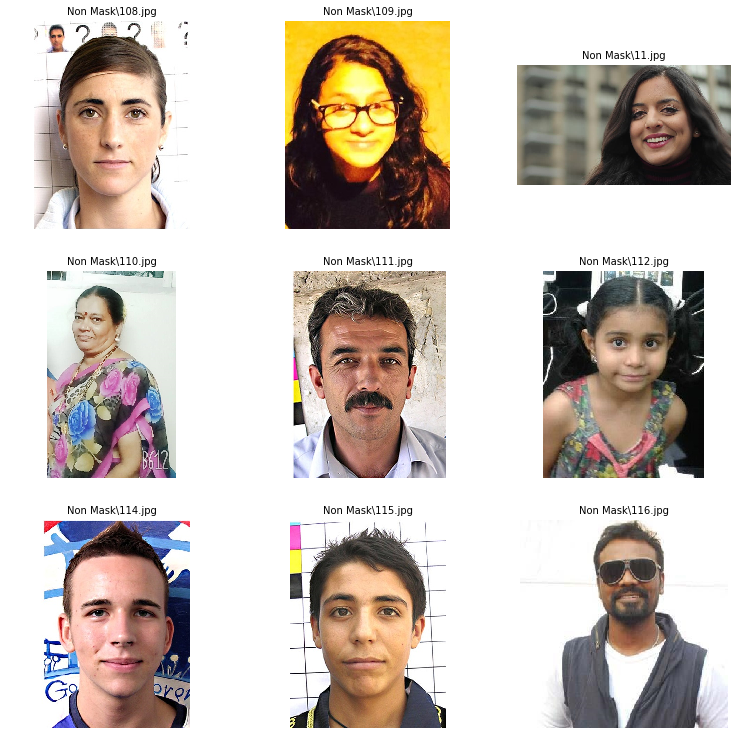

In [6]:
plt.figure(figsize=(13,13))

nomask_pic = []
for i in train_No_mask[10:19]:
  nomask_pic.append(os.path.join(train_No_mask_dir,i))


for i in range(0,len(nomask_pic)):
  data = nomask_pic[i].split('/',5)[5]
  sp = plt.subplot(3,3,i+1)
  sp.axis('Off')
  image = mpimg.imread(nomask_pic[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [7]:
train_data = ImageDataGenerator(rescale=1./255, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
valid_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

i = 32
training = train_data.flow_from_directory(train_dir, target_size=(i,i), batch_size=64, class_mode='binary', seed=3)
valid = valid_data.flow_from_directory(valid_dir, target_size=(i,i), batch_size=64, class_mode='binary', seed = 3)
test = test_data.flow_from_directory(test_dir, target_size=(i,i), batch_size=64, class_mode='binary', seed = 3)

Found 1685 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 293 images belonging to 2 classes.


In [8]:
#proposed model

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(i,i,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(32,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))

model.add(Conv2D(64,(3,3),padding="same",use_bias=True ,activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(64,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))

model.add(Conv2D(128,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(512,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu",use_bias=True))
model.add(Dropout(0.1))
model.add(Dense(512,activation="relu",use_bias=True))

model.add(Dense(units=2, activation="softmax"))

opt= Adam(lr=.0005)
model.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
__________

In [10]:
history = History()
model.fit_generator(training, epochs=30, validation_data=valid, callbacks=[history])

Epoch 1/30
27/27 [==============================] - 19s 712ms/step - loss: 0.6700 - acc: 0.5582 - val_loss: 0.6862 - val_acc: 0.6111
Epoch 2/30
27/27 [==============================] - 10s 375ms/step - loss: 0.4755 - acc: 0.8014 - val_loss: 0.5631 - val_acc: 0.7288
Epoch 3/30
27/27 [==============================] - 11s 401ms/step - loss: 0.3036 - acc: 0.8819 - val_loss: 0.5646 - val_acc: 0.7418
Epoch 4/30
27/27 [==============================] - 10s 369ms/step - loss: 0.2705 - acc: 0.8969 - val_loss: 0.4963 - val_acc: 0.7778
Epoch 5/30
27/27 [==============================] - 10s 384ms/step - loss: 0.2311 - acc: 0.9126 - val_loss: 0.3522 - val_acc: 0.8791
Epoch 6/30
27/27 [==============================] - 11s 392ms/step - loss: 0.2280 - acc: 0.9097 - val_loss: 0.4162 - val_acc: 0.8170
Epoch 7/30
27/27 [==============================] - 10s 370ms/step - loss: 0.2147 - acc: 0.9253 - val_loss: 0.3612 - val_acc: 0.8758
Epoch 8/30
27/27 [==============================] - 9s 349ms/step - l

In [11]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [15]:
metrics = pd.DataFrame(model.history.history)
metrics.tail(10)

,val_loss,val_acc,loss,acc
20,0.256003,0.911765,0.141223,0.944807
21,0.362185,0.839869,0.147695,0.948961
22,0.283849,0.892157,0.131557,0.949555
23,0.364365,0.839869,0.151687,0.940653
24,0.322037,0.872549,0.151811,0.941246
25,0.239707,0.915033,0.121025,0.956677
26,0.230224,0.924837,0.120968,0.953116
27,0.219822,0.911765,0.113509,0.957270
28,0.310181,0.866013,0.119338,0.948961
29,0.229798,0.921569,0.117179,0.953709


Text(0.5, 0, 'epoch')

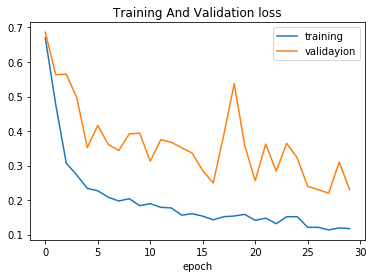

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validayion'])
plt.title('Training And Validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

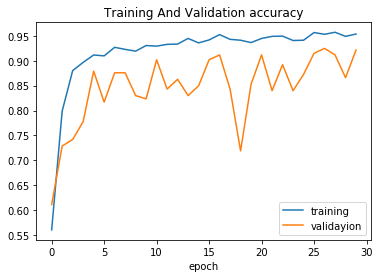

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validayion'])
plt.title('Training And Validation accuracy')
plt.xlabel('epoch')

In [22]:
test_loss , test_acc = model.evaluate(test)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))
model.save('face.h5')

5/5 [==============================] - 2s 460ms/step
test loss:0.12917042821137165 test acc:0.9556313978934043


Epoch 1/30
27/27 [==============================] - 19s 693ms/step - loss: 0.2151 - acc: 0.9358 - val_loss: 0.2364 - val_acc: 0.9281
Epoch 2/30
27/27 [==============================] - 14s 521ms/step - loss: 0.1024 - acc: 0.9583 - val_loss: 0.2380 - val_acc: 0.9150
Epoch 3/30
27/27 [==============================] - 14s 501ms/step - loss: 0.0942 - acc: 0.9601 - val_loss: 0.2353 - val_acc: 0.9085
Epoch 4/30
27/27 [==============================] - 14s 516ms/step - loss: 0.0961 - acc: 0.9664 - val_loss: 0.2524 - val_acc: 0.8922
Epoch 5/30
27/27 [==============================] - 14s 520ms/step - loss: 0.0847 - acc: 0.9716 - val_loss: 0.2267 - val_acc: 0.9118
Epoch 6/30
27/27 [==============================] - 14s 516ms/step - loss: 0.0836 - acc: 0.9705 - val_loss: 0.2336 - val_acc: 0.9052
Epoch 7/30
27/27 [==============================] - 14s 534ms/step - loss: 0.0869 - acc: 0.9693 - val_loss: 0.2389 - val_acc: 0.8987
Epoch 8/30
27/27 [==============================] - 15s 537ms/step - 

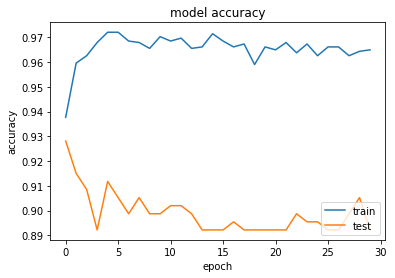

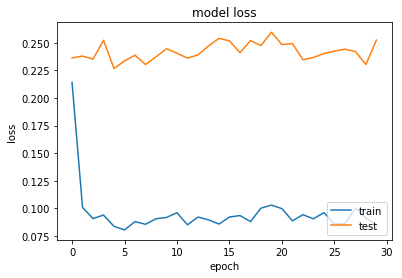

In [33]:
#loading face recognition model, removing last two layers for transfer learning
model_m = model
import keras
model_m = Sequential(model_m.layers[:-2])

#add last two model to train the face mask recogniton
model_m.add(Dense(512,activation="relu",use_bias=True))
model_m.add(Dense(units=2, activation="softmax"))

#freez all but the last two layers: transfer learning
for layer in model_m.layers[:-2]:
    layer.trainable = False

#train the model for masked face recogniton
opt= Adam(lr=.0005)
model_m.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history_m = History()
model_m.fit_generator(training, epochs=30, validation_data= valid, callbacks=[history_m])

print(model_m.summary())
print(history_m.history.keys())

#plot_model(model_m, to_file='Mask_Recog.png')
# summarize history for accuracy
plt.plot(history_m.history['acc'])
plt.plot(history_m.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [34]:
test_loss , test_acc = model_m.evaluate(test)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

5/5 [==============================] - 2s 471ms/step
test loss:0.1235930547881045 test acc:0.9488054593268515


In [37]:


model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(training,epochs=30,validation_data=valid)

Epoch 1/30
27/27 [==============================] - 21s 771ms/step - loss: 0.7241 - acc: 0.5472 - val_loss: 0.6808 - val_acc: 0.5719
Epoch 2/30
27/27 [==============================] - 15s 568ms/step - loss: 0.5474 - acc: 0.7233 - val_loss: 0.5642 - val_acc: 0.7810
Epoch 3/30
27/27 [==============================] - 16s 579ms/step - loss: 0.3466 - acc: 0.8581 - val_loss: 0.4620 - val_acc: 0.7876
Epoch 4/30
27/27 [==============================] - 15s 545ms/step - loss: 0.3113 - acc: 0.8772 - val_loss: 0.3668 - val_acc: 0.8660
Epoch 5/30
27/27 [==============================] - 15s 567ms/step - loss: 0.2671 - acc: 0.8964 - val_loss: 0.3173 - val_acc: 0.8758
Epoch 6/30
27/27 [==============================] - 15s 560ms/step - loss: 0.2609 - acc: 0.9039 - val_loss: 0.3270 - val_acc: 0.8497
Epoch 7/30
27/27 [==============================] - 16s 575ms/step - loss: 0.2457 - acc: 0.9068 - val_loss: 0.3337 - val_acc: 0.8529
Epoch 8/30
27/27 [==============================] - 15s 561ms/step - 

Text(0.5, 0, 'epoch')

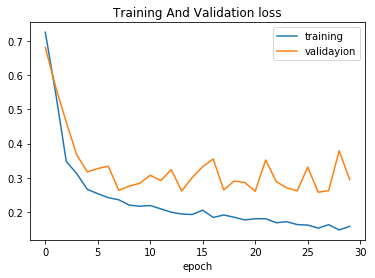

In [38]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validayion'])
plt.title('Training And Validation loss')
plt.xlabel('epoch')



Text(0.5, 0, 'epoch')

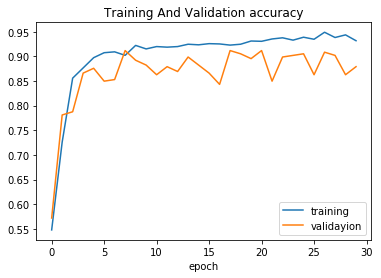

In [39]:


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validayion'])
plt.title('Training And Validation accuracy')
plt.xlabel('epoch')



In [41]:


test_loss , test_acc = model.evaluate(test)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))



5/5 [==============================] - 2s 450ms/step
test loss:0.13312056223280194 test acc:0.9351535856520357
